In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import xport
import math
%matplotlib inline

### Loading & Merging Datasets

In [101]:
df_ = pd.read_csv('/Users/hector/Downloads/2012/DR1TOT_G.csv')

In [102]:
df_['DR1TCARB'].mean()

253.39269042794172

In [103]:
df_2 = pd.read_csv('/Users/hector/Downloads/2012/DR2TOT_G.csv')

In [104]:
df_2['DR2TVC'].mean()

86.29502401280686

In [105]:
df = pd.merge(df_,df_2,on='SEQN') #MERGING 2 DIET DATASETS ON INDIVIDUALS

### Averaging nutrition across the two days diet was tracked

In [106]:

df['DLYFAT'] = (df['DR2TTFAT']+df['DR1TTFAT'])/2 
df['DLYCARB'] = (df['DR1TCARB']+df['DR2TCARB'])/2
df['DLYKCAL'] = (df['DR1TKCAL']+df['DR2TKCAL'])/2
df['DLYSGR'] = (df['DR1TSUGR']+df['DR2TSUGR'])/2
df['DLYFBR'] = (df['DR1TFIBE']+df['DR2TFIBE'])/2
df['DLYSFAT'] = (df['DR1TSFAT']+df['DR2TSFAT'])/2
df['DLYPFAT'] = (df['DR1TPFAT']+df['DR2TPFAT'])/2
df['DLYMFAT'] = (df['DR1TMFAT']+df['DR2TMFAT'])/2
df['DLYCHOL'] = (df['DR1TCHOL']+df['DR2TCHOL'])/2
df['DLYVB12'] = (df['DR1TVB12']+df['DR2TVB12'])/2
df['DLYVD'] = (df['DR1TVD']+df['DR2TVD'])/2
df['DLYPRT'] = (df['DR1TPROT']+df['DR2TPROT'])/2

df['DLYVC'] = (df['DR1TVC']+df['DR2TVC'])/2
df['DLYMAGN'] = (df['DR1TMAGN']+df['DR1TMAGN'])/2
df['DLYIRON'] = (df['DR1TIRON']+df['DR2TIRON'])/2
df['DLYCALC'] = (df['DR1TCALC']+df['DR2TCALC'])/2
df['DLYPHOS'] = (df['DR1TPHOS']+df['DR2TPHOS'])/2
df['DLYZINC'] = (df['DR1TZINC']+df['DR2TZINC'])/2     
df['DLYCOPP'] = (df['DR1TCOPP']+df['DR2TCOPP'])/2
df['DLYSODI'] = (df['DR1TSODI']+df['DR2TSODI'])/2
df['DLYPOTA'] = (df['DR1TPOTA']+df['DR2TPOTA'])/2
df['DLYCAFF'] = (df['DR1TCAFF']+df['DR2TCAFF'])/2

df['DLYBCAR'] = (df['DR1TBCAR']+df['DR2TBCAR'])/2
df['DLYACAR'] = (df['DR1TACAR']+df['DR2TACAR'])/2
df['DLYCRYP'] = (df['DR1TCRYP']+df['DR2TCRYP'])/2
df['DLYVARA'] = (df['DR1TVARA']+df['DR2TVARA'])/2
df['DLYRET'] = (df['DR1TRET']+df['DR2TRET'])/2
df['DLYATOA'] = (df['DR1TATOA']+df['DR2TATOA'])/2

df['DLYATOC'] = (df['DR1TATOC']+df['DR2TATOC'])/2
df['DLYLYCO'] = (df['DR1TLYCO']+df['DR2TLYCO'])/2
df['DLYLZ'] = (df['DR1TLZ']+df['DR2TLZ'])/2
df['DLYVB1'] = (df['DR1TVB1']+df['DR2TVB1'])/2
df['DLYVB2'] = (df['DR1TVB2']+df['DR2TVB2'])/2
df['DLYNIAC'] = (df['DR1TNIAC']+df['DR2TNIAC'])/2

df['DLYVB6'] = (df['DR1TVB6']+df['DR2TVB6'])/2
df['DLYFOLA'] = (df['DR1TFOLA']+df['DR2TFOLA'])/2
df['DLYB12A'] = (df['DR1TB12A']+df['DR2TB12A'])/2
df['DLYFDFE'] = (df['DR1TFDFE']+df['DR2TFDFE'])/2
df['DLYCHL'] = (df['DR1TCHL']+df['DR2TCHL'])/2
df['DLYALCO'] = (df['DR1TALCO']+df['DR2TALCO'])/2



### Filling null values with averages

In [107]:
df['DLYKCAL'] = df['DLYKCAL'].fillna(value=1922.573069730163)
df['DLYPRT'] = df['DLYPRT'].fillna(value=73.37452711728567)
df['DLYCARB'] = df['DLYCARB'].fillna(value=244.69370090836205)
df['DLYFAT'] = df['DLYFAT'].fillna(value=71.30237042479298)



df['DLYSGR'] = df['DLYSGR'].fillna(value=110.43290408763079)
df['DLYFBR'] = df['DLYFBR'].fillna(value=15.5787269569864)
df['DLYSFAT'] = df['DLYSFAT'].fillna(value=23.42120718674856)
df['DLYPFAT'] = df['DLYPFAT'].fillna(value=16.801623296820775)
df['DLYMFAT'] = df['DLYMFAT'].fillna(value=25.225938819129006)
df['DLYCHOL'] = df['DLYCHOL'].fillna(value=247.98143200641198)
df['DLYVB12'] = df['DLYVB12'].fillna(value=4.7946212930804055)
df['DLYVD'] = df['DLYVD'].fillna(value=5.281325140261836)


df['DLYMAGN'] = df['DLYMAGN'].fillna(value=267.09238288234593)
df['DLYIRON'] = df['DLYIRON'].fillna(value=14.496503473149918)
df['DLYCALC'] = df['DLYCALC'].fillna(value=943.6775981832754)
df['DLYPHOS'] = df['DLYPHOS'].fillna(value=1267.0305904354796)
df['DLYZINC'] = df['DLYZINC'].fillna(value=10.224765562383132)
df['DLYCOPP'] = df['DLYCOPP'].fillna(value=1.1178726956986358)
df['DLYSODI'] = df['DLYSODI'].fillna(value=3135.162503339567)
df['DLYPOTA'] = df['DLYPOTA'].fillna(value=2421.867018434411)
df['DLYCAFF'] = df['DLYCAFF'].fillna(value=84.87109270638526)

df['DLYBCAR'] = df['DLYBCAR'].fillna(value=1904.8177932139995)
df['DLYACAR'] = df['DLYACAR'].fillna(value=362.9207854662036)
df['DLYCRYP'] = df['DLYCRYP'].fillna(value=81.48817793213999)
df['DLYVARA'] = df['DLYVARA'].fillna(value=603.8861207587497)
df['DLYRET'] = df['DLYRET'].fillna(value=426.8956051295752)
df['DLYATOA'] = df['DLYATOA'].fillna(value=0.753600721346511)

df['DLYATOC'] = df['DLYATOC'].fillna(value=7.601106064654022)
df['DLYLYCO'] = df['DLYLYCO'].fillna(value=4593.141998397008)
df['DLYLZ'] = df['DLYLZ'].fillna(value=1350.0444830349986)
df['DLYVB1'] = df['DLYVB1'].fillna(value=1.5146941624365493)
df['DLYVB2'] = df['DLYVB2'].fillna(value=1.9225999866417294)
df['DLYNIAC'] = df['DLYNIAC'].fillna(value=22.834809043548038)

df['DLYVB6'] = df['DLYVB6'].fillna(value=1.8985641196900873)
df['DLYFOLA'] = df['DLYFOLA'].fillna(value=380.4688752337697)
df['DLYB12A'] = df['DLYB12A'].fillna(value=1.023773043013628)
df['DLYFDFE'] = df['DLYFDFE'].fillna(value=513.640195030724)
df['DLYCHL'] = df['DLYCHL'].fillna(value=288.83434410900253)
df['DLYALCO'] = df['DLYALCO'].fillna(value=4.626255677264222)
df['DLYVC'] = df['DLYVC'].fillna(value=86.29502401280686)

In [206]:
df['DLYKCAL'].mean()

1922.573069730193

In [207]:
df['DLYCARB'].mean()

244.69370090836563

In [208]:
df['DLYFAT'].mean()

71.30237042479504

In [209]:
df['DLYPRT'].mean()


73.37452711728436

In [210]:
df['DLYVD'].mean()

5.281325140261895

### Loading Data on Physical Activity & Creating New Variables

In [113]:
df_PA = pd.read_csv('/Users/hector/Downloads/2012/PAQ_G.csv')
df_demo = pd.read_csv('/Users/hector/Downloads/2012/DEMO_G.csv')
df_ = pd.merge(df_PA,df_demo,on='SEQN')
#df_['DYSVWRK'].value_counts()

In [149]:
WALKBIKE = []
for row in df_['PAQ635']:
    if row == 1:
        WALKBIKE.append(1)
    elif row == 2:
        WALKBIKE.append(0)
    else:
        WALKBIKE.append(0)
df_['WALKBIKE'] = pd.Series(WALKBIKE)

VWRK = []
for row in df_['PAQ605']:
    if row ==1:
        VWRK.append(row)
    else:
        VWRK.append(0)
df_['VWRK'] = pd.Series(VWRK)

MWRK = []
for row in df_['PAQ620']:
    if row ==1:
        MWRK.append(row)
    else:
        MWRK.append(0)
df_['MWRK'] = pd.Series(MWRK)

DYSVWRK = []
for row in df_['PAQ610']:
    if 0 < row < 8:
        DYSVWRK.append(row)
    else:
        DYSVWRK.append(0)
df_['DYSVWRK'] = pd.Series(DYSVWRK)

DYSMWRK = []
for row in df_['PAQ620']:
    if row == 1:
        DYSMWRK.append(1)   
    elif row == 2:
        DYSMWRK.append(0)
        
DYSMWRK = []
for row in df_['PAQ625']:
    if 0 < row < 8:
        DYSMWRK.append(row)
    else:
        DYSMWRK.append(0)
df_['DYSMWRK'] = pd.Series(DYSMWRK)

MNVWRK= []
for row in df_['PAD615']:
    if 9 < row < 9999:
        MNVWRK.append(row)
    else:
        MNVWRK.append(0)
df_['MNVWRK'] = pd.Series(MNVWRK)



MNMWRK= []
for row in df_['PAD630']:
    if 9 < row < 9999:
        MNMWRK.append(row)
    else:
        MNMWRK.append(0)
df_['MNMWRK'] = pd.Series(MNMWRK)


DYSWLKBK = []
for row in df_['PAQ640']:
    if 0 < row < 8:
        DYSWLKBK.append(row)
    else:
        DYSWLKBK.append(0)
df_['DYSWLKBK'] = pd.Series(DYSWLKBK)

MNWLKBK= []
for row in df_['PAD645']:
    if 9 < row < 9999:
        MNWLKBK.append(row)
    else:
        MNWLKBK.append(0)
df_['MNWLKBK'] = pd.Series(MNWLKBK)

VREC = []
for row in df_['PAQ650']:
    if row == 1:
        VREC.append(1)
    elif row == 2:
        VREC.append(0)
df_['VREC'] = pd.Series(VREC)

DYSVREC = []
for row in df_['PAQ655']:
    if 0 < row < 8:
        DYSVREC.append(row)
    else:
        DYSVREC.append(0)
df_['DYSVREC'] = pd.Series(DYSVREC)

MNVREC= []
for row in df_['PAD660']:
    if 9 < row < 9999:
        MNVREC.append(row)
    else:
        MNVREC.append(0)
df_['MNVREC'] = pd.Series(MNVREC)



MREC = []
for row in df_['PAQ665']:
    if row == 1:
        MREC.append(1)
    elif row == 2:
        MREC.append(0)
df_['MREC'] = pd.Series(MREC)

DYSMREC = []
for row in df_['PAQ670']:
    if 0 < row < 8:
        DYSMREC.append(row)
    else:
        DYSMREC.append(0)
df_['DYSMREC'] = pd.Series(DYSMREC)

MNMREC= []
for row in df_['PAD675']:
    if 9 < row < 9999:
        MNMREC.append(row)
    else:
        MNMREC.append(0)
df_['MNMREC'] = pd.Series(MNMREC)


SDNTRY= []
for row in df_['PAD680']:
    if 0 < row < 1200:
        SDNTRY.append(row)
df_['SDNTRY'] = pd.Series(SDNTRY)
df_['SDNTRY'] = df_['SDNTRY'].fillna(value = 383.45265657465126)

HRSTV = []
for row in df_['PAQ710']:
    if row < 8:
        HRSTV.append(row)
    elif row == 8:
        HRSTV.append(0)
df_['HRSTV'] = pd.Series(HRSTV)


HRSCOMP= []
for row in df_['PAQ715']:
    if  row < 8:
        HRSCOMP.append(row)
    elif row == 8:
        HRSCOMP.append(0)
df_['HRSCOMP'] = pd.Series(HRSCOMP)

GNDR = []
for row in df_['RIAGENDR']:
    if  row == 1:
        GNDR.append(row)
    elif row == 2:
        GNDR.append(0)
df_['GNDR'] = pd.Series(GNDR)


MXA = []
HISP =[]
WHT = []
BLK = []
ASN = []
OTHR = []
for row in df_['RIDRETH3']:
    if  row == 1:
        MXA.append(1)
    else:
        MXA.append(0)
df_['MXA'] = pd.Series(MXA)

for row in df_['RIDRETH3']:
    if  row == 2:
        HISP.append(1)
    else:
        HISP.append(0)
df_['HISP'] = pd.Series(HISP)

for row in df_['RIDRETH3']:
    if  row == 3:
        WHT.append(1)
    else:
        WHT.append(0)
df_['WHT'] = pd.Series(WHT)

for row in df_['RIDRETH3']:
    if  row == 4:
        BLK.append(1)
    else:
        BLK.append(0)
df_['BLK'] = pd.Series(BLK)

for row in df_['RIDRETH3']:
    if  row == 6:
        ASN.append(1)
    else:
        ASN.append(0)
df_['ASN'] = pd.Series(ASN)

FRGN = []
for row in df_['DMDBORN4']:
    if  row == 2:
        FRGN.append(1)
    else:
        FRGN.append(0)
df_['FRGN'] = pd.Series(FRGN)

CTZN = []
for row in df_['DMDBORN4']:
    if  row == 1:
        CTZN.append(1)
    elif row == 2:
        CTZN.append(0)
df_['CTZN'] = pd.Series(CTZN)

VET = []
for row in df_['DMQMILIZ']:
    if  row == 1:
        VET.append(1)
    else:
        VET.append(0)
df_['VET'] = pd.Series(VET)

VET = []
for row in df_['DMQMILIZ']:
    if  row == 1:
        VET.append(1)
    else:
        VET.append(0)
df_['VET'] = pd.Series(VET)

NOHS = []
for row in df_['DMDEDUC2']:
    if  row == 1:
        NOHS.append(1)
    else:
        NOHS.append(0)
df_['NOHS'] = pd.Series(NOHS)

SMHS = []
for row in df_['DMDEDUC2']:
    if  row == 2:
        SMHS.append(1)
    else:
        SMHS.append(0)
df_['SMHS'] = pd.Series(SMHS)

HSGRAD = []
for row in df_['DMDEDUC2']:
    if  row == 3:
        HSGRAD.append(1)
    else:
        HSGRAD.append(0)
df_['HSGRAD'] = pd.Series(HSGRAD)

SMCOL = [] 
for row in df_['DMDEDUC2']:
    if  row == 4:
        SMCOL.append(1)
    else:
        SMCOL.append(0)
df_['SMCOL'] = pd.Series(SMCOL)

COLGRAD = []                        
for row in df_['DMDEDUC2']:
    if  row == 5:
        COLGRAD.append(1)
    else:
        COLGRAD.append(0)
df_['COLGRAD'] = pd.Series(COLGRAD)

#GRDSCHL = []
#MDSCHL = []
#HSCHL = []
#RCNTGRAD = []
#for row in df_['DMDEDUC3']:
#    if  row < 6 :
#        GRDSCHL.append(1)
#        MDSCHL.append(0)
#        HSCHL.append(0)
#        RCNTGRAD.append(0)
#    elif 6 <= row <= 8:
#        GRDSCHL.append(0)
#        MDSCHL.append(1)
#        HSCHL.append(0)
#        RCNTGRAD.append(0)
#    elif 8 < row < 13:
#        HSCHL.append(0)
#        MDSCHL.append(0)
#        HSCHL.append(1)
#        RCNTGRAD.append(0)
#    elif 12 < row < 16:
#        HSCHL.append(0)
#        MDSCHL.append(0)
#        HSCHL.append(0)
#        RCNTGRAD.append(1)
#    else:
#        GRDSCHL.append(0)
#        MDSCHL.append(0)
#        HSCHL.append(0)
#        RCNTGRAD.append(0)
#df_['GRDSCHL'] = pd.Series(GRDSCHL)
#df_['MDSCHL'] = pd.Series(MDSCHL)
#df_['HSCHL'] = pd.Series(HSCHL)
#df_['RCNTGRAD'] = pd.Series(RCNTGRAD)

SEPERATED = []
DIVORCED = []
MARRIED = []
WIDOWED = []
PARTNER = []
for row in df_['DMDMARTL']:
    if  row == 1 :
        MARRIED.append(1)
        DIVORCED.append(0)
        SEPERATED.append(0)
        WIDOWED.append(0)
        PARTNER.append(0)
    elif row == 2:
        MARRIED.append(0)
        DIVORCED.append(0)
        SEPERATED.append(0)
        WIDOWED.append(1)
        PARTNER.append(0)
    elif row == 3:
        MARRIED.append(0)
        DIVORCED.append(1)
        SEPERATED.append(0)
        WIDOWED.append(0)
        PARTNER.append(0)
    elif row == 4:
        MARRIED.append(0)
        DIVORCED.append(0)
        SEPERATED.append(1)
        WIDOWED.append(0)
        PARTNER.append(0)
    elif row == 6:
        MARRIED.append(0)
        DIVORCED.append(0)
        SEPERATED.append(0)
        WIDOWED.append(0)
        PARTNER.append(1)
    else:
        MARRIED.append(0)
        DIVORCED.append(0)
        SEPERATED.append(0)
        WIDOWED.append(0) 
        PARTNER.append(0)

df_['MARRIED'] = pd.Series(MARRIED)
df_['WIDOWED'] = pd.Series(WIDOWED)
df_['DIVORCED'] = pd.Series(DIVORCED)
df_['SEPERATED'] = pd.Series(SEPERATED)
df_['PARTNER'] = pd.Series(PARTNER)        




INCOME = []                        
for row in df_['INDHHIN2']:
    if  row < 16:
        INCOME.append(row)
df_['INCOME'] = pd.Series(INCOME)




In [115]:
INCOME1 = []   
INCOME2 = []                        
INCOME3 = []                        
INCOME4 = []
INCOME5 = []   
INCOME6 = []                        
INCOME7 = []                        
INCOME8 = []
INCOME9 = []   
INCOME10 = []                        
INCOME11 = []                        
INCOME12 = []
for row in df_['INDHHIN2']:
    if  row == 1:
        INCOME1.append(1)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row ==2:
        INCOME1.append(0)
        INCOME2.append(1)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row ==3:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(1)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row ==4:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(1)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row ==5 :
        INCOME1.append(1)
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(1)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row == 6:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(1)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row == 7:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(1)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row == 8:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(1)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row ==9:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(1)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row ==10:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(1)
        INCOME11.append(0)
        INCOME12.append(0)
    elif row ==14:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(1)
        INCOME12.append(0)
    elif row ==15:
        INCOME1.append(0)
        INCOME2.append(0)
        INCOME3.append(0)
        INCOME4.append(0)
        INCOME5.append(0)
        INCOME6.append(0)
        INCOME7.append(0)
        INCOME8.append(0)
        INCOME9.append(0)
        INCOME10.append(0)
        INCOME11.append(0)
        INCOME12.append(1)
df_['INCOME1'] = pd.Series(INCOME1)
df_['INCOME2'] = pd.Series(INCOME2)
df_['INCOME3'] = pd.Series(INCOME3)
df_['INCOME4'] = pd.Series(INCOME4)
df_['INCOME5'] = pd.Series(INCOME5)
df_['INCOME6'] = pd.Series(INCOME6)
df_['INCOME7'] = pd.Series(INCOME7)
df_['INCOME8'] = pd.Series(INCOME8)
df_['INCOME9'] = pd.Series(INCOME9)
df_['INCOME10'] = pd.Series(INCOME10)
df_['INCOME11'] = pd.Series(INCOME11)
df_['INCOME12'] = pd.Series(INCOME12)

### Loading & Merging More Data 

In [116]:
df_SLP = pd.read_csv('/Users/hector/Downloads/2012/SLQ_G.csv')

In [117]:
df_1 = pd.merge(df_,df,on='SEQN')

In [118]:
df_ = pd.merge(df_1,df_SLP,on='SEQN')

In [119]:
SLEEP = []
for row in df_['SLD010H']:
    if 1 < row <= 12:
        SLEEP.append(row)
df_['SLEEPHRS'] =  pd.Series(SLEEP)



SLEEPP = []
for row in df_['SLQ050']:
    if row == 1:
        SLEEPP.append(row)
    elif row == 2:
        SLEEPP.append(0)
    else:
        SLEEPP.append(0)
df_['SLEEPPROB'] =  pd.Series(SLEEPP)




SLEEPDIS = []
for row in df_['SLQ060']:
    if row == 1:
        SLEEPDIS.append(row)
    elif row == 2:
        SLEEPDIS.append(0)
    else:
        SLEEPDIS.append(0)
df_['SLEEPDIS'] =  pd.Series(SLEEPDIS)

In [204]:
df_[['GRPSTR','INCOME','DYSVWRK','WALKBIKE','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')

,GRPSTR,INCOME,DYSVWRK,WALKBIKE,DLYKCAL,DLYCARB,DLYSGR,DLYFAT,DLYPRT,DYSWLKBK,...,DLYNIAC,DLYFDFE,DLYVB2,DLYCHL,DLYALCO,DLYFOLA,DLYCRYP,SLEEPHRS,SLEEPPROB,SLEEPDIS
0,69.300000,14.000000,0.0,0,3268.00000,411.180000,170.730000,135.94000,107.465000,0.0,...,30.845500,465.000000,2.2110,382.950000,0.000000,348.500000,4.500000,8.000000,0.0,0.0
1,71.000000,8.000000,5.0,1,1743.50000,172.660000,40.630000,40.13000,79.460000,0.0,...,26.122500,246.000000,2.0450,359.400000,56.150000,239.500000,67.500000,8.000000,1.0,0.0
2,75.800000,2.000000,0.0,0,2341.00000,355.700000,169.320000,69.17000,77.135000,0.0,...,25.400500,622.500000,1.3200,217.600000,0.000000,429.000000,13.000000,8.000000,0.0,0.0
3,50.500000,5.000000,0.0,0,1675.50000,180.845000,61.280000,38.69500,53.765000,0.0,...,17.469500,405.500000,0.8460,169.050000,57.550000,306.500000,100.500000,8.000000,0.0,0.0
4,28.300000,10.000000,0.0,0,1365.50000,198.855000,102.180000,47.32000,45.150000,0.0,...,15.505000,502.000000,1.6175,307.600000,0.000000,377.500000,126.000000,9.000000,0.0,0.0
5,22.500000,15.000000,0.0,0,2095.00000,241.485000,72.020000,73.67000,121.290000,0.0,...,30.179500,510.500000,2.1670,324.600000,7.450000,426.000000,22.500000,7.000000,0.0,0.0
6,86.500000,1.000000,0.0,0,2198.00000,308.260000,61.555000,60.21500,108.945000,0.0,...,29.489000,642.000000,1.8645,403.150000,0.000000,483.500000,0.000000,8.000000,0.0,0.0
7,62.586934,15.000000,0.0,0,1743.50000,249.500000,130.720000,60.07000,58.625000,0.0,...,16.991000,416.000000,2.1960,270.500000,0.000000,321.500000,34.500000,6.000000,1.0,1.0
8,69.100000,5.000000,0.0,0,3027.00000,346.680000,140.080000,126.63500,134.215000,5.0,...,33.577000,734.500000,2.9230,527.450000,0.000000,636.000000,17.500000,8.000000,0.0,0.0
9,69.600000,15.000000,0.0,0,2695.00000,286.605000,87.025000,107.85500,151.535000,0.0,...,66.869000,2379.500000,3.9990,392.950000,0.000000,1514.500000,1.000000,7.000000,1.0,0.0


In [57]:
df_ = pd.merge(df3,df4,on='SEQN')

In [58]:
df5 = pd.read_csv('/Users/hector/Downloads/nhsurvey-2013-2014/questionnaire.csv')

In [203]:
df_['DIAB'].value_counts()#.dropna(axis=0,how='any')

0    5407
1     512
Name: DIAB, dtype: int64

In [172]:
## CREATING OUR LABELS FOR PREDICTIONS
bmi = []
for row in df_bmi['BMXBMI']:
    if 0 < row < 100:
        bmi.append(row)
    else:
        bmi.append(25.339537316902955)        
df_['BMI'] = pd.Series(bmi)

In [173]:
## CREATING OUR LABELS FOR PREDICTIONS
OBESE = []
for row in df_['BMI']:
    if row >= 30:
        OBESE.append(1)
    elif row < 30:
        OBESE.append(0)
df_['OBESE'] = pd.Series(OBESE)

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5889    0
5890    0
5891    0
5892    0
5893    0
5894    0
5895    0
5896    0
5897    0
5898    0
5899    1
5900    0
5901    1
5902    0
5903    0
5904    0
5905    0
5906    0
5907    0
5908    0
5909    1
5910    0
5911    0
5912    0
5913    0
5914    1
5915    1
5916    0
5917    0
5918    0
Name: WALKBIKE, Length: 5919, dtype: int64>

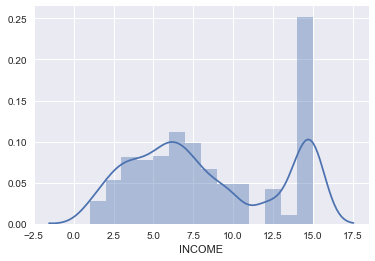

In [175]:
sns.distplot(df_['INCOME'].dropna(axis=0,how='any'));

In [183]:
df_['INCOME'] = df_['INCOME'].fillna(value=8.248795288238444)

### Loading in diet details for features from CSV file

In [166]:
df_diet = pd.read_csv('/Users/hector/Downloads/2012/DBQ_G.csv')

In [167]:
MILK = []
for row in df_diet['DBQ223A']:
    if row == 10:
        MILK.append(1)
    else:
        MILK.append(0)
df_['WHLMLK'] = pd.Series(MILK)

In [561]:
NONFOOD = []
for row in df_['CBD090']:
    if  0 <= row < 4000:
        NONFOOD.append(row)
df_['NONFOOD'] = pd.Series(NONFOOD)

CARRYOUT = []
for row in df_['CBD130']:
    if  0 <= row < 4000:
        CARRYOUT.append(row)
df_['CARRYOUT'] = pd.Series(CARRYOUT)


GROCERIES = []
for row in df_['CBD070']:
    if  0 <= row < 4290:
        GROCERIES.append(row)
df_['GROCERIES'] = pd.Series(GROCERIES)

### Load in new data from CSV, Create new feature columns

In [153]:
df_cons = pd.read_csv('/Users/hector/Downloads/2012/CBQ_G.csv')

In [156]:
NONFOOD = []
for row in df_cons['CBD090']:
    if  0 <= row < 4000:
        NONFOOD.append(row)
df_cons['NONFOOD'] = pd.Series(NONFOOD)

CARRYOUT = []
for row in df_cons['CBD130']:
    if  0 <= row < 4000:
        CARRYOUT.append(row)
df_cons['CARRYOUT'] = pd.Series(CARRYOUT)


GROCERIES = []
for row in df_cons['CBD070']:
    if  0 <= row < 4290:
        GROCERIES.append(row)
df_cons['GROCERIES'] = pd.Series(GROCERIES)

FOODOTHER = []
for row in df_cons['CBD110']:
    if  0 <= row < 4000:
        FOODOTHER.append(row)
df_cons['FOODOTHER'] = pd.Series(FOODOTHER)


ATEOUT = []
for row in df_cons['CBD120']:
    if  0 <= row < 4000:
        ATEOUT.append(row)
df_cons['ATEOUT'] = pd.Series(ATEOUT)


In [163]:
df_['GROCERIES'] = df_cons['GROCERIES'].fillna(value=446.3330882352941)
df_['ATEOUT'] = df_cons['ATEOUT'].fillna(value=139.79795207431647)
df_['CARRYOUT'] = df_cons['CARRYOUT'].fillna(value=24.44489498856311)
df_['FOODOTHER'] = df_cons['FOODOTHER'].fillna(value=87.69354838709677)
df_['NONFOOD'] = df_cons['NONFOOD'].fillna(value=33.65912677538138)

In [211]:
df_cons['NONFOOD'].mean()

33.65912677538138

In [126]:
df_GRP = pd.read_csv('/Users/hector/Downloads/2012/MGX_G.csv')
df_GRP['MGDCGSZ'].mean()

62.58693374858414

In [128]:
df_['GRPSTR'] = df_GRP['MGDCGSZ'].fillna(value=62.58693374858414)

In [129]:
df_['SLEEPHRS'] = df_['SLEEPHRS'].fillna(value=6.888211382113822)

In [194]:
df_['SDNTRY']

0       300.000000
1       300.000000
2       360.000000
3       720.000000
4       540.000000
5       300.000000
6       180.000000
7       300.000000
8       600.000000
9       540.000000
10      120.000000
11      480.000000
12      480.000000
13      600.000000
14      480.000000
15      360.000000
16      420.000000
17      420.000000
18      300.000000
19      480.000000
20      180.000000
21      480.000000
22      360.000000
23      360.000000
24      120.000000
25      600.000000
26      300.000000
27       90.000000
28      480.000000
29      300.000000
           ...    
5889    383.452657
5890    383.452657
5891    383.452657
5892    383.452657
5893    383.452657
5894    383.452657
5895    383.452657
5896    383.452657
5897    383.452657
5898    383.452657
5899    383.452657
5900    383.452657
5901    383.452657
5902    383.452657
5903    383.452657
5904    383.452657
5905    383.452657
5906    383.452657
5907    383.452657
5908    383.452657
5909    383.452657
5910    383.

In [136]:
df_DIAB = pd.read_csv('/Users/hector/Downloads/2012/DIQ.csv')

In [137]:
df_['DIAB'] = df_DIAB['DIQ010']

In [139]:
DIABETIC = []
for row in df_['DIAB']:
    if row == 1 or row ==3:
        DIABETIC.append(1)
    else:
        DIABETIC.append(0)        
df_['DIAB'] = pd.Series(DIABETIC)

In [192]:
#BMXBMI
df_bmi = pd.read_csv('/Users/hector/Downloads/2012/BMX_G.csv')
df_bmi['BMXBMI'].mean()

25.339537316902955

In [193]:
bmi = []
for row in df_bmi['BMXBMI']:
    if 0 < row < 100:
        bmi.append(row)
    else:
        bmi.append(25.339537316902955)
df_['BMI'] = pd.Series(bmi)

In [187]:
df_[['OBESE','RIDAGEYR','BMI','DIAB','GRPSTR','INCOME1','INCOME2','INCOME3','INCOME4','INCOME5','INCOME6','INCOME7','INCOME8','INCOME9','INCOME10','INCOME11','INCOME12','DYSVWRK','WALKBIKE','ATEOUT','CARRYOUT','GROCERIES','DLYKCAL','DLYCARB','DLYSGR','DLYFAT','DLYPRT','DYSWLKBK','MNWLKBK','VREC','DYSVREC','MNVREC','MREC','DYSMREC','MNMREC','SDNTRY','MXA','WHT','BLK','ASN','HRSTV','HRSCOMP','SMHS','MWRK','VWRK','DYSMWRK','MNMWRK','DYSVWRK','MNVWRK', 'HSGRAD','SMCOL','COLGRAD','HISP','FRGN','GNDR','CTZN','VET','SEPERATED','DIVORCED','PARTNER','WIDOWED','MARRIED','DLYMFAT','DLYPFAT','DLYSFAT','DLYFBR','DLYMAGN','DLYSODI','DLYIRON',
'DLYZINC','DLYCOPP','DLYCAFF','DLYBCAR','DLYACAR','DLYPHOS','DLYVARA','DLYRET','DLYATOA','DLYATOC','DLYLYCO','DLYLZ','DLYVB12','DLYVB6','DLYB12A','DLYVC','DLYVD','DLYVB1','DLYPOTA','DLYNIAC','DLYFDFE','DLYVB2','DLYCHL','DLYALCO','DLYFOLA','DLYCRYP','WHLMLK','SLEEPHRS','SLEEPPROB','SLEEPDIS']].dropna(axis=0,how='any')

,OBESE,RIDAGEYR,BMI,DIAB,GRPSTR,INCOME1,INCOME2,INCOME3,INCOME4,INCOME5,...,DLYFDFE,DLYVB2,DLYCHL,DLYALCO,DLYFOLA,DLYCRYP,WHLMLK,SLEEPHRS,SLEEPPROB,SLEEPDIS
0,0,22.0,23.3,0,69.300000,0.0,0.0,0.0,0.0,0.0,...,465.000000,2.2110,382.950000,0.000000,348.500000,4.500000,0,8.0,0.0,0.0
1,0,44.0,14.2,0,71.000000,0.0,0.0,0.0,0.0,0.0,...,246.000000,2.0450,359.400000,56.150000,239.500000,67.500000,1,8.0,1.0,0.0
2,0,21.0,17.3,0,75.800000,0.0,0.0,0.0,0.0,0.0,...,622.500000,1.3200,217.600000,0.000000,429.000000,13.000000,0,8.0,0.0,0.0
3,0,43.0,23.2,0,50.500000,0.0,0.0,0.0,0.0,0.0,...,405.500000,0.8460,169.050000,57.550000,306.500000,100.500000,0,8.0,0.0,0.0
4,0,80.0,27.2,0,28.300000,0.0,0.0,0.0,0.0,0.0,...,502.000000,1.6175,307.600000,0.000000,377.500000,126.000000,1,9.0,0.0,0.0
5,0,34.0,16.2,0,22.500000,1.0,0.0,0.0,0.0,0.0,...,510.500000,2.1670,324.600000,7.450000,426.000000,22.500000,0,7.0,0.0,0.0
6,0,51.0,15.4,0,86.500000,0.0,0.0,0.0,0.0,1.0,...,642.000000,1.8645,403.150000,0.000000,483.500000,0.000000,0,8.0,0.0,0.0
7,0,80.0,20.1,0,62.586934,1.0,0.0,0.0,1.0,0.0,...,416.000000,2.1960,270.500000,0.000000,321.500000,34.500000,0,6.0,1.0,1.0
8,0,55.0,18.2,0,69.100000,0.0,0.0,0.0,0.0,0.0,...,734.500000,2.9230,527.450000,0.000000,636.000000,17.500000,0,8.0,0.0,0.0
9,0,35.0,19.9,0,69.600000,0.0,0.0,0.0,0.0,0.0,...,2379.500000,3.9990,392.950000,0.000000,1514.500000,1.000000,0,7.0,1.0,0.0


In [188]:
df_.to_csv('2012.csv')

In [191]:
df_['INCOME1'].value_counts()

0.0    5150
1.0     645
Name: INCOME1, dtype: int64